In [1]:
!pip install opencv-python


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 5.6 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.9 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/12.9 MB 5.6 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.9 MB 6.0 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/12.9 MB 6.1 MB/s eta 0:00:02
   ----------------------- ---------------- 7.6/12.9 MB 6.1 MB/s eta 0:00:01
   -------------------------- ------------- 8.7/12.9 MB 5.9 MB/s eta 0:00:01
   ------------------------------ --------- 10.0/12.9 MB 5.9 MB/s eta 0:00:01
   ----------------------------------- ---- 11.5/12.9 MB 6.0 MB/s eta 0:00:01
   ------------------------------------ --- 11.8/12.9 MB 5.6 MB/s eta 0:00:01
   ---

In [3]:
!pip install matplotlib scikit-learn pandas


In [4]:
import random
import numpy as np
import os
import glob
import cv2

In [5]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

In [6]:
def get_data():
    train_dir = "../data/train/"
    X_train = []
    y_train = []
    
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join(train_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl)
            img = resize(fl, 64, 64)
            X_train.append(img)
            y_train.append(j)
    return X_train, y_train

In [7]:
X_train, y = get_data()

Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [8]:
X_train = np.asarray(X_train)
y = np.asarray(y)
print(X_train.shape)

(0,)


In [12]:
import cv2
import os
import numpy as np

def get_data(data_dir="data/raw/train", img_height=64, img_width=64):
    X = []
    y = []
    
    # each subfolder = one class
    for label, folder in enumerate(os.listdir(data_dir)):
        folder_path = os.path.join(data_dir, folder)
        if not os.path.isdir(folder_path):
            continue
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (img_width, img_height))
            X.append(img.flatten())   # flatten image into 1D vector
            y.append(label)           # label = folder index
    
    return np.array(X), np.array(y)


In [13]:
# Assuming you already have a get_data() function that loads your images
X, y = get_data()   # load features (images) and labels

from sklearn.model_selection import train_test_split

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)

Training data shape:  (17939, 12288)
Validation data shape:  (4485, 12288)


In [15]:
!pip install future


  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
Using cached future-1.0.0-py3-none-any.whl (491 kB)


In [16]:
from linear_classifier import LinearSVM

learning_rates = [9e-9, 1e-8, 8e-9]
regularization_strengths = [9e4, 7e4, 8e4]

results = {}
best_val = -1   
best_svm = None 

for lr in learning_rates:
    for reg in regularization_strengths:
        linearSVM = LinearSVM()
        linearSVM.train(X_train, y_train, learning_rate =lr, reg=reg, num_iters=1500, verbose=False)
        y_train_pred = linearSVM.predict(X_train)
        y_val_pred = linearSVM.predict(X_val)
        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy = np.mean(y_val == y_val_pred)
        results[(lr, reg)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = linearSVM
        
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 8.000000e-09 reg 7.000000e+04 train accuracy: 0.536615 val accuracy: 0.536222
lr 8.000000e-09 reg 8.000000e+04 train accuracy: 0.602122 val accuracy: 0.598222
lr 8.000000e-09 reg 9.000000e+04 train accuracy: 0.659462 val accuracy: 0.659111
lr 9.000000e-09 reg 7.000000e+04 train accuracy: 0.625625 val accuracy: 0.620889
lr 9.000000e-09 reg 8.000000e+04 train accuracy: 0.692188 val accuracy: 0.697556
lr 9.000000e-09 reg 9.000000e+04 train accuracy: 0.744861 val accuracy: 0.745111
lr 1.000000e-08 reg 7.000000e+04 train accuracy: 0.710357 val accuracy: 0.708889
lr 1.000000e-08 reg 8.000000e+04 train accuracy: 0.752639 val accuracy: 0.749111
lr 1.000000e-08 reg 9.000000e+04 train accuracy: 0.762029 val accuracy: 0.753556
best validation accuracy achieved during cross-validation: 0.753556


In [17]:
import matplotlib.pyplot as plt
linearSVM = LinearSVM()
loss_hist = linearSVM.train(X_train, y_train, learning_rate =1e-8, reg=9e4, num_iters=1500, verbose=True)
y_train_pred = linearSVM.predict(X_train)
y_val_pred = linearSVM.predict(X_val)
train_accuracy = np.mean(y_train == y_train_pred)
val_accuracy = np.mean(y_val == y_val_pred)
print('train accuracy: %f val accuracy: %f' % (train_accuracy, val_accuracy))

iteration 0 / 1500: loss 11151.886073
iteration 100 / 1500: loss 7746.498586
iteration 200 / 1500: loss 5400.380627
iteration 300 / 1500: loss 3765.632908
iteration 400 / 1500: loss 2626.734190
iteration 500 / 1500: loss 1831.500338
iteration 600 / 1500: loss 1277.928732
iteration 700 / 1500: loss 891.498757
iteration 800 / 1500: loss 622.455198
iteration 900 / 1500: loss 434.979399
iteration 1000 / 1500: loss 304.521655
iteration 1100 / 1500: loss 213.321476
iteration 1200 / 1500: loss 149.703743
iteration 1300 / 1500: loss 105.207060
iteration 1400 / 1500: loss 74.409380
train accuracy: 0.762029 val accuracy: 0.753556


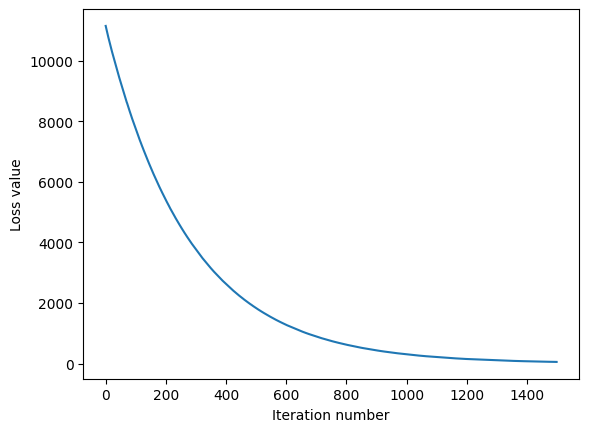

In [18]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.savefig("loss.jpg")